In [1]:
#import the basic library for the numerical computation, data manipulation and data visulization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for the offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
tesla = pd.read_csv("data\TSLA.csv")

In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2843 non-null   object 
 1   Open       2843 non-null   float64
 2   High       2843 non-null   float64
 3   Low        2843 non-null   float64
 4   Close      2843 non-null   float64
 5   Adj Close  2843 non-null   float64
 6   Volume     2843 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.6+ KB


In [4]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [5]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2843 non-null   datetime64[ns]
 1   Open       2843 non-null   float64       
 2   High       2843 non-null   float64       
 3   Low        2843 non-null   float64       
 4   Close      2843 non-null   float64       
 5   Adj Close  2843 non-null   float64       
 6   Volume     2843 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 155.6 KB


In [6]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total number of days = {(tesla.Date.max()-tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-07-01 00:00:00 2021-10-14 00:00:00
Total number of days = 4123 days


In [7]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2.843000e+03
mean,105.868475,108.031370,103.555733,105.924597,105.924597,3.141524e+07
std,188.738974,192.483055,184.638617,188.836358,188.836358,2.841880e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,10.698000,11.026000,10.420000,10.727000,10.727000,1.251050e+07
50%,45.874001,46.493999,45.102001,45.916000,45.916000,2.481500e+07
75%,65.021000,66.251999,64.015001,65.275002,65.275002,4.012025e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


<Axes: >

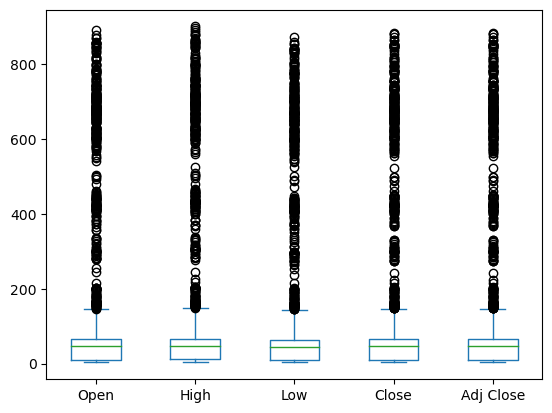

In [8]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [9]:
#Setting the Layout for plot
layout = go.Layout(
    title='Stock Price of the Tesla',
    xaxis=dict(
        title='Date',
        titlefont = dict(
            family='Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont = dict(
            family='Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'],'y':tesla['Close']}]
plot = go.Figure(data = tesla_data,layout=layout)

In [10]:
#plot offline of the data
iplot(plot)

In [11]:
#Building the regression model
from sklearn.model_selection import train_test_split

# For Preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For Model Evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [12]:
#Split the data into train and test sets
X=np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [13]:
#Feature Scaling
scaler = StandardScaler().fit(X_train)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#creating a linear model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [16]:
#plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data,layout=layout)

In [17]:
iplot(plot2)

In [18]:
#Calculate scores for model evaluation
scores = f''' 
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_scores'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'mse'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''

In [19]:
print(scores)

 
Metric           Train                Test        
r2_scores 0.41044228972678165	0.4131373098429034
mse       21136.840352516032	20635.915166425984

